In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('input/2014-2017.csv', delimiter=';')

In [3]:
df.head()

,match_id,date,winner_id,loser_id,winner_rank,loser_rank,winner_rank_points,loser_rank_points,winner_elo_rating,loser_elo_rating
0,155602,21/04/2014,4894,4022,50.0,15.0,947.0,2065.0,1867.0,2036.0
1,155603,21/04/2014,5763,4659,16.0,92.0,2040.0,605.0,2112.0,1861.0
2,155604,21/04/2014,4789,3908,24.0,102.0,1580.0,569.0,2085.0,1871.0
3,155605,21/04/2014,4585,4467,43.0,28.0,1016.0,1315.0,1902.0,1979.0
4,155202,06/03/2014,5231,4742,31.0,1.0,1205.0,14085.0,1992.0,2510.0


In [8]:
from random import randint

In [69]:
def randomsample(df):
    # creating arrays to put in DataFrame at the end
    match_id = []
    date = []
    player1_id = []
    player2_id = []
    player1_rank = []
    player2_rank = []
    player1_rank_points = []
    player2_rank_points = []
    player1_elo_rating = []
    player2_elo_rating = []
    won = []
    
    for i in range(0, df.shape[0]):

        # create random number to choose win or loose (we have a high number of matches so the sampling should be 50/50)
        rand = randint(0, 1)

        match_id.append(df.iloc[i]['match_id'])
        date.append(df.iloc[i]['date'])

        if rand == 0:
            # ids
            player1_id.append(df.iloc[i]['loser_id'])
            player2_id.append(df.iloc[i]['winner_id'])
            # ranks
            player1_rank.append(df.iloc[i]['loser_rank'])
            player2_rank.append(df.iloc[i]['winner_rank'])
            # rank points
            player1_rank_points.append(df.iloc[i]['loser_rank_points'])
            player2_rank_points.append(df.iloc[i]['winner_rank_points'])
            # elo ratings
            player1_elo_rating.append(df.iloc[i]['loser_elo_rating'])
            player2_elo_rating.append(df.iloc[i]['winner_elo_rating'])
            # won
            won.append(0)
        else:
            # ids
            player1_id.append(df.iloc[i]['winner_id'])
            player2_id.append(df.iloc[i]['loser_id'])
            # ranks
            player1_rank.append(df.iloc[i]['winner_rank'])
            player2_rank.append(df.iloc[i]['loser_rank'])
            # rank points
            player1_rank_points.append(df.iloc[i]['winner_rank_points'])
            player2_rank_points.append(df.iloc[i]['loser_rank_points'])
            # elo ratings
            player1_elo_rating.append(df.iloc[i]['winner_elo_rating'])
            player2_elo_rating.append(df.iloc[i]['loser_elo_rating'])
            # won
            won.append(1)

    return pd.DataFrame({
        'match_id': match_id,
        'date': date,
        'player1_id': player1_id,
        'player2_id': player2_id,
        'player1_rank': player1_rank,
        'player2_rank': player2_rank,
        'player1_rank_points': player1_rank_points,
        'player2_rank_points': player2_rank_points,
        'player1_elo_rating': player1_elo_rating,
        'player2_elo_rating': player2_elo_rating,
        'won': won
    })

In [71]:
oversampled_df = randomsample(df)

In [72]:
oversampled_df.head()

,match_id,date,player1_id,player2_id,player1_rank,player2_rank,player1_rank_points,player2_rank_points,player1_elo_rating,player2_elo_rating,won
0,155602,21/04/2014,4894,4022,50.0,15.0,947.0,2065.0,1867.0,2036.0,1
1,155603,21/04/2014,4659,5763,92.0,16.0,605.0,2040.0,1861.0,2112.0,0
2,155604,21/04/2014,3908,4789,102.0,24.0,569.0,1580.0,1871.0,2085.0,0
3,155605,21/04/2014,4467,4585,28.0,43.0,1315.0,1016.0,1979.0,1902.0,0
4,155202,06/03/2014,5231,4742,31.0,1.0,1205.0,14085.0,1992.0,2510.0,1


In [74]:
import matplotlib.pyplot as plt

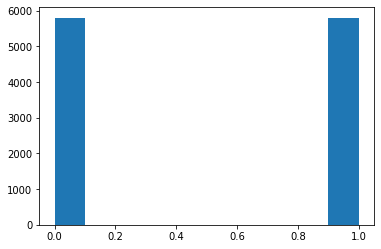

In [76]:
plt.hist(oversampled_df['won'])
plt.show()

In [78]:
oversampled_df['won'].value_counts()

0    5802
1    5800
Name: won, dtype: int64

In [ ]:
oversampled_df.to_csv('input/balanced-2014-2017.csv', index=False)